In [41]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from time import strftime

import matplotlib.dates as mdates
from scipy.signal import medfilt

%matplotlib

Using matplotlib backend: TkAgg


In [3]:
ms = [10.257, 10.3, 10.29]
bs = [-12.2, -10.2, -8.4]

LABELS = ["Inner bath", "External bath", "Ambient"]

In [28]:
def loadData(file_name, time_adjust = 0, is_in_temperature = True):
    string = np.genfromtxt(file_name, delimiter = "\t", skip_header = 1, dtype = str)
    times = string[:, 0]
    
    times = [datetime.strptime(text, "%Y-%m-%d %H:%M:%S") - timedelta(hours = time_adjust) for text in times]
    data = string[:, 1:].astype(float)
    if not is_in_temperature:
        data = data * 1000
        data = dataToTemperature(data)
    return times, data

def dataToTemperature(data):
    for i in range(3):
        data[:, i] = (data[:, i] - bs[i]) / ms[i]
    return data.round(2)

def plotTemperatureInTime(time, data):
    fig, ax = plt.subplots(figsize = (8, 4.5))
    for i in range(3):
        ax.plot(time, data[:, i], label = LABELS[i])

    date_format = mdates.DateFormatter('%d/%H:%M')
    ax.xaxis.set_major_formatter(date_format)
    ax.xaxis.set_minor_formatter(date_format)

    ax.legend()
    ax.set_xlabel("Day/Hour")
    ax.set_ylabel("Temperature ($^\circ$C)")

    ax.grid()
    
    fig.autofmt_xdate()
    fig.tight_layout()

    return fig, ax

def makeCompiled(time, data):
    with open("Compiled.txt", "w") as file:
        file.write("Datetime\tInner Bath (C)\tExternal Bath (C)\tAmbient (C)")
        line = [""]*4
        for (t, d) in zip(time, data):
            line[0] = t.strftime("%Y-%m-%d %H:%M:%S")
            line[1:] = ["%.2f"%val for val in d]
            file.write("\t".join(line) + "\r\n")
            
def unify(files, times):
    times_ = np.zeros((0))
    datas = np.zeros((0, 3))
    for (file, time) in zip(files, times):
        t, d = loadData(file, time)
        times_ = np.append(times_, t)
        datas = np.append(datas, d, axis = 0)
    _, pos = np.unique(times_, return_index=True)
    return times_[pos], datas_[pos]

def unifyLoaded(times, datas):
    times_ = np.zeros((0))
    datas_ = np.zeros((0, 3))
    for (t, d) in zip(times, datas):
        times_ = np.append(times_, t)
        datas_ = np.append(datas_, d, axis = 0)
    _, pos = np.unique(times_, return_index=True)
    return times_[pos], datas_[pos]

def filterZone(min, max, data, size = 1000):
    data[min : max, 0] = (data[min - size : min, 0].mean() + data[max : max + size, 0].mean()) / 2
    
    return data

# Time, Data / 10 - Oct 

In [4]:
time, data = loadData("TemperatureData.txt")

In [5]:
data2 = data.copy()

In [6]:
data2 = filterZone(25000, 35000, data2)
data2 = filterZone(75000, 81000, data2)

data2 = medfilt(data2, [251, 1])

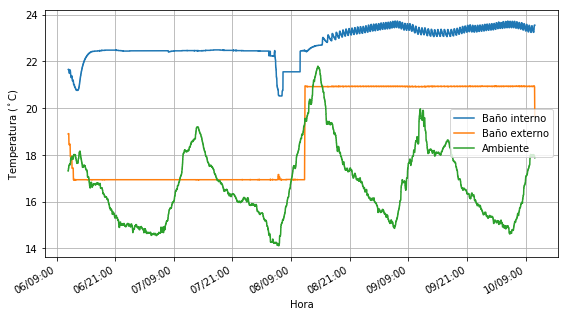

In [7]:
fig, ax = plotTemperatureInTime(time, data2)
# fig.savefig("Stability.png", dpi = 300)
plt.show()

In [8]:
time_c, data_c = loadData("Compiled.txt")

In [9]:
time_c, data_c = unifyLoaded([time_c, time], [data_c, data2])

makeCompiled(time_c, data_c)

# Time, Data / 14 - Oct

In [18]:
time_c, data_c = loadData("Compiled.txt")
time_1, data_1 = loadData("TemperatureData.txt")
time_2, data_2 = loadData("TemperatureData2.txt")

In [32]:
data2 = data_1.copy()
data2 = medfilt(data2, [251, 1])

In [25]:
time_t, data_t = unifyLoaded([time_c, time_1], [data_c, data2])

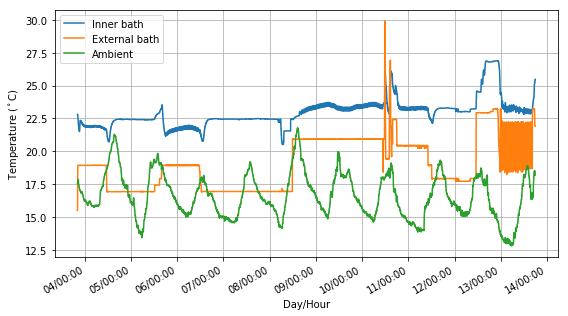

In [29]:
fig, ax = plotTemperatureInTime(time_t, data_t)

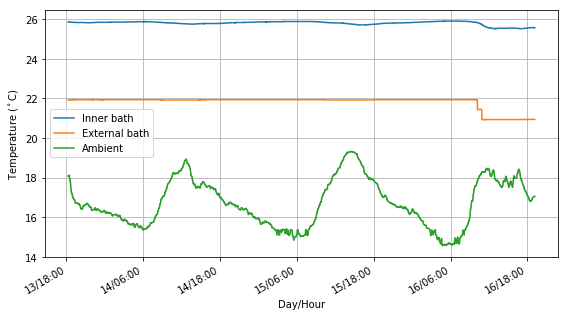

In [30]:
data22 = data_2.copy()
data22 = medfilt(data22, [251, 1])
fig, ax = plotTemperatureInTime(time_2, data22)

In [33]:
time_c, data_c = unifyLoaded([time_c, time_1, time_2], [data_c, data2, data22])

makeCompiled(time_c, data_c)

In [35]:
makeCompiled(time_c, data_c)

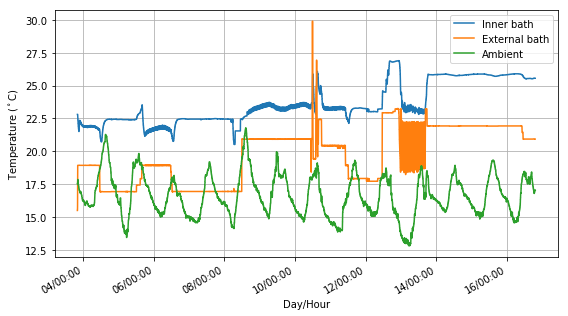

In [34]:
fig, ax = plotTemperatureInTime(time_c, data_c)

# Always

In [39]:
time_c, data_c = loadData("Compiled.txt")

In [42]:
DOWNSAMPLE = 100

fig, ax = plotTemperatureInTime(time_c[::DOWNSAMPLE], data_c[::DOWNSAMPLE])
fig.savefig("Stability.png", dpi = 300)
plt.show()